## Bem vindo! 

##### Esse projeto visa simular um corpo em queda livre, sob a ação da resistência do ar, ou não, com o intuito de analisar os princípios de conservação e dissipação de energia (proposta de projeto 4)

**Feito por:** Arthur de Carvalho, Marcel Figueredo e Paulo de Pinho

**Bibliotecas usadas:** Math, Numpy e Matplotlib 

**Constantes usadas:** 

- **Aceleração da gravidade:**  9,8 m/s²
- **Força de resistência do ar (arrasto):** 0,0892 x v² 


In [111]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [112]:
g = 9.8
m_objeto = float(input("Insira a massa do objeto (Kg): "))
h_objeto = float(input("Insira a distância do objeto em relação ao chão (m): "))

Considerando resistência do ar no cálculo da altura durante a queda.


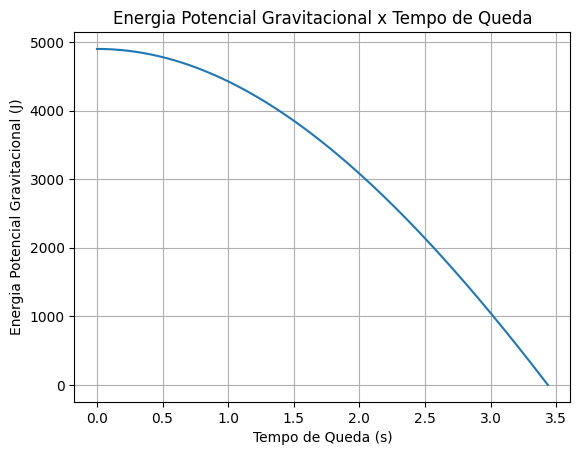

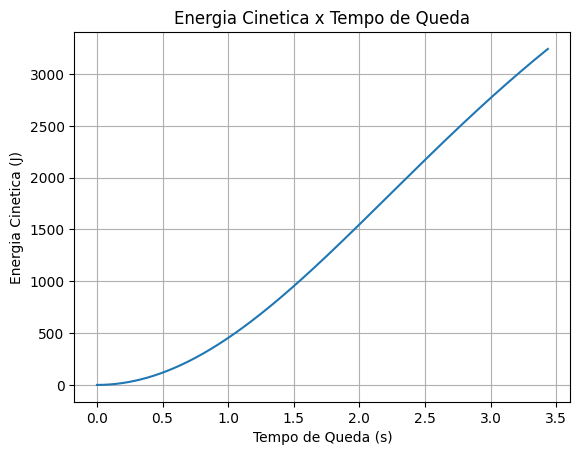

A energia total do sistema não é constante, logo há alguma perda de energia (devido à resistência do ar).


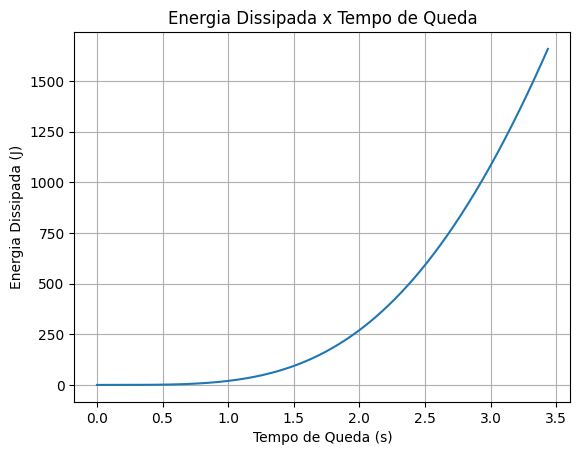

In [113]:
#implementando resistencia do ar
input_resistencia = input("Deseja considerar a resistência do ar? (s/n): ").strip().lower()
if input_resistencia == 's':
    print("Considerando resistência do ar no cálculo da altura durante a queda.")
    k = 0.0892
    v_terminal = math.sqrt(m_objeto * g / k)
    termo_exp = math.exp((g * h_objeto) / (v_terminal**2))
    t_final = (v_terminal / g) * math.acosh(termo_exp)
    t_queda = np.linspace(0, t_final, num=1000)
    v = v_terminal * np.tanh((g / v_terminal) * t_queda)
    h_t = h_objeto - (m_objeto / k) * np.log(np.cosh((k / m_objeto) * t_queda * v_terminal))
    h_t = np.maximum(h_t, 0.0) 

else:
    print("Desconsiderando resistência do ar no cálculo da altura durante a queda.")
    # tempo de queda final:
    t_final = math.sqrt(2 * h_objeto / g)
    # tempo de queda em diferentes instantes:
    t_queda = np.linspace(0, t_final, num=1000) 
    # computando altura como função do tempo sob a queda livre: h(t) = h0 - 0.5*g*t^2
    h_t = h_objeto - 0.5 * g * t_queda**2
    # limitando a zero para que o objeto não atravesse o chão após o impacto:
    h_t = np.maximum(h_t, 0.0)
    v = g * t_queda
    
# calculo da energia cinetica nos diversos instantes de tempo
energia_cinetica = 0.5 * m_objeto * v ** 2

# energia potencial gravitacional em relação ao tempo Epg(t) = m * g * h(t)
energia_potencial = m_objeto * g * h_t

# plotando energia potencial gravitacional em função do tempo de queda
fig, ax = plt.subplots()
ax.plot(t_queda, energia_potencial)
ax.set_title("Energia Potencial Gravitacional x Tempo de Queda")
ax.set_xlabel("Tempo de Queda (s)")
ax.set_ylabel("Energia Potencial Gravitacional (J)")
plt.grid(True)
plt.show()

# plotando energia cinetica em função do tempo de queda
fig, ax = plt.subplots()
ax.plot(t_queda, energia_cinetica)
ax.set_title("Energia Cinetica x Tempo de Queda")
ax.set_xlabel("Tempo de Queda (s)")
ax.set_ylabel("Energia Cinetica (J)")
plt.grid(True)
plt.show()

#comparacao entre energia potencial e cinetica
energia_total = energia_potencial + energia_cinetica
#verificar se a energia total é constante
energia_total_constante = np.allclose(energia_total, energia_total[0])
if energia_total_constante:
    print("A energia total do sistema é constante ao longo do tempo, conforme esperado pela conservação de energia.")
else:
    print("A energia total do sistema não é constante, logo há alguma perda de energia (devido à resistência do ar).")
    energia_dissipada = m_objeto * g * h_objeto - (energia_cinetica + energia_potencial)
    fig, ax = plt.subplots()
    ax.plot(t_queda, energia_dissipada)
    ax.set_title("Energia Dissipada x Tempo de Queda")
    ax.set_xlabel("Tempo de Queda (s)")
    ax.set_ylabel("Energia Dissipada (J)")
    plt.grid(True)
    plt.show()